In [14]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [15]:
import numpy as np
from typing import Tuple

# Squared Distance Functionality
def squared_distance(x,y):
    return np.sum(np.square(x-y))

def kMeans(k: int, data: np.ndarray, centroids: np.ndarray) -> Tuple[np.ndarray, float]:

    # In the initial phase, we randomly pick k data points for the centers of the initial clusters. Since it is given to us, we don't make np.random_choice()
    # Afterwards, we initialize the desired clusters.
    cluster_mean = centroids
    mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis = 0) - np.expand_dims(cluster_mean, axis = 1), axis = 2)
    labels = np.argmin(mean_dist_mat, axis = 0)

    # Now we update the clusters until convergence occurs.
    updated = True
    init_num = 0
    while updated:
        updated = False

        # In this stage, we measure the cluster means.
        cluster_mean = np.array([np.sum(data[labels==i],axis=0)/np.sum(labels==i) for i in range(k)])

        # During this process, we find out which new cluster each data point belongs to
        mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis = 0) - np.expand_dims(cluster_mean, axis = 1), axis = 2)
        new_cluster_allocation = np.argmin(mean_dist_mat, axis = 0)

        # In the end, updating the cluster allocation happens. If nothing changes, we merely exit the loop and return the converged result.
        if not np.array_equal(labels, new_cluster_allocation):
            updated = True
            labels = new_cluster_allocation
        else:
            inertia = np.sum(np.min(mean_dist_mat, axis = 0))
    return labels, inertia


Inertia for K-means clustering with all four features is 97.225



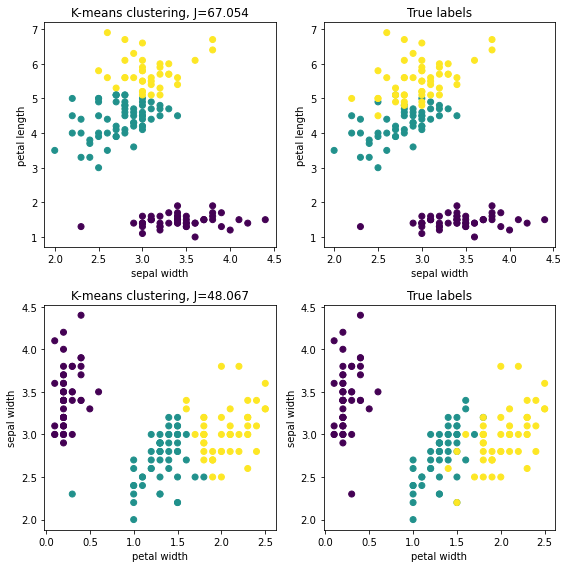

In [16]:
X1 = iris.data[:, 1:3]

"""Fill here. X1 is an ndarray of observed data with 2 features, 
sepal width and petal length. Note that the x-axis is sepal width when we plot the data."""

X2 = iris.data[:, [3, 1]]
"""Fill here. X2 is an ndarray of observed data with 2 features,
petal width and sepal width. Note that the x-axis is petal width when we plot the data."""

X3 = iris.data[:,:]

y_iris = iris.target

labels_1, inertia_1 = kMeans(3, X1, np.array([[2.5,2],[3,4],[4,6]]))
labels_2, inertia_2 = kMeans(3, X2, np.array([[1,4],[1.5,2],[2,3]]))
labels_3, inertia_3 = kMeans(3, X3, np.array([[5,2.5,2,0.5],[6,3,3,1],[7,4,6,2]]))

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:,1], c = labels_1)
plt.title("K-means clustering, J=%.3f" % inertia_1)
plt.xlabel('sepal width')
plt.ylabel('petal length')

plt.subplot(222)
plt.scatter(X1[:,0], X1[:,1], c = y_iris)
plt.title("True labels")
plt.xlabel('sepal width')
plt.ylabel('petal length')

plt.subplot(223)
plt.scatter(X2[:,0], X2[:,1], c = labels_2)
plt.title("K-means clustering, J=%.3f" % inertia_2)
plt.xlabel('petal width')
plt.ylabel('sepal width')

plt.subplot(224)
plt.scatter(X2[:,0], X2[:,1], c = y_iris)
plt.title("True labels")
plt.xlabel('petal width')
plt.ylabel('sepal width')
plt.tight_layout()

print("Inertia for K-means clustering with all four features is %.3f\n" % inertia_3)